### 1. Libraries import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, make_scorer
from sklearn.feature_selection import RFE

import joblib
from imblearn.combine import SMOTEENN

### 2. Data read-in

In [2]:
df = pd.read_csv("data.csv")
df.head().T

,0,1,2,3,4
Diabetes_binary,0.0,1.0,1.0,1.0,0.0
HighBP,0.0,1.0,1.0,0.0,0.0
HighChol,1.0,0.0,1.0,1.0,0.0
CholCheck,1.0,1.0,1.0,1.0,1.0
BMI,15.0,28.0,33.0,29.0,24.0
Smoker,1.0,0.0,0.0,0.0,1.0
Stroke,0.0,0.0,0.0,1.0,0.0
HeartDiseaseorAttack,0.0,1.0,0.0,1.0,0.0
PhysActivity,0.0,0.0,1.0,1.0,0.0
Fruits,1.0,1.0,1.0,1.0,0.0


### 3. Column preprocessing

&emsp; - Converting to binary **Overweight** column using **BMI** index\
&emsp; - Renaming columns so they are more understandable

In [3]:
df["Overweight"] = df["BMI"].apply(lambda x: 1 if x > 25 else 0)

column_mapping = {
    "AnyHealthcare": "Health_care",
    "Diabetes_binary": "Diabetes",
    "HighBP": "High_blood_pressure",
    "HighChol": "High_cholesterol",
    "CholCheck": "Examined_cholesterol",
    "HeartDiseaseorAttack": "Heart_problems",
    "PhysActivity": "Physical_activity",
    "HvyAlcoholConsump": "Heavy_drinking",
    "NoDocbcCost": "Couldnt_afford_doc",
    "GenHlth": "Genetic_health",
    "MentHlth": "Mental_health",
    "PhysHlth": "Physical_health",
    "DiffWalk": "Difficulty_walking",
    "Sex": "Male",
}

df.rename(columns=column_mapping, inplace=True)

df.drop("BMI", axis=1, inplace=True)

df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Diabetes,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
High_blood_pressure,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
High_cholesterol,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
Examined_cholesterol,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Smoker,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
Stroke,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Heart_problems,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Physical_activity,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Fruits,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
Veggies,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0


### 4. Selecting binary columns

&emsp; - Columns that have only 2 unique values, i.e. they are binary

In [4]:
binary_columns = df.columns[df.nunique() == 2]
binary_df = df[binary_columns]

binary_df.head()

,Diabetes,High_blood_pressure,High_cholesterol,Examined_cholesterol,Smoker,Stroke,Heart_problems,Physical_activity,Fruits,Veggies,Heavy_drinking,Health_care,Couldnt_afford_doc,Difficulty_walking,Male,Overweight
0,0.0,0,1.0,1,1.0,0.0,0.0,0,1,1,0,1,0.0,0.0,0,0
1,1.0,1,0.0,1,0.0,0.0,1.0,0,1,0,0,1,0.0,0.0,0,1
2,1.0,1,1.0,1,0.0,0.0,0.0,1,1,1,0,1,0.0,0.0,0,1
3,1.0,0,1.0,1,0.0,1.0,1.0,1,1,1,0,1,0.0,1.0,1,1
4,0.0,0,0.0,1,1.0,0.0,0.0,0,0,0,0,1,0.0,1.0,1,0


In [5]:
def diabetes_per_binary_features(df: pd.DataFrame):
    df_cat = pd.melt(df, id_vars=["Diabetes"], var_name="variable", value_name="value")

    palette = sns.color_palette("Set2")

    _, axes = plt.subplots(2, 1, figsize=(14, 10), sharey=True)

    # Plot for diabetes
    sns.barplot(
        data=df_cat[df_cat["Diabetes"] == 1],
        x="variable",
        hue="value",
        y="Diabetes",
        estimator=lambda x: len(x) / len(df_cat[df_cat["Diabetes"] == 1]),
        errorbar=None,
        palette=palette[:2],
        ax=axes[0],
    )

    original_ticks = axes[0].get_xticks()
    original_labels = axes[0].get_xticklabels()

    axes[0].set_xticks(original_ticks)
    axes[0].set_xticklabels(original_labels, rotation=45, ha="right")

    axes[0].set_xlabel("")
    axes[0].set_ylabel("Proportion")
    axes[0].set_title("Proportion of Features for Diabetes")

    # Plot for non-diabetes
    sns.barplot(
        data=df_cat[df_cat["Diabetes"] == 0],
        x="variable",
        hue="value",
        y="Diabetes",
        estimator=lambda x: len(x) / len(df_cat[df_cat["Diabetes"] == 0]),
        errorbar=None,
        palette=palette[:2],
        ax=axes[1],
    )

    axes[1].set_xlabel("")
    axes[1].set_title("Proportion of Features for Non-Diabetes")
    axes[1].set_xticks(original_ticks)
    axes[1].set_xticklabels(original_labels, rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

### 5. Features proportion for *Diabetes* and *Non-Diabetes* records

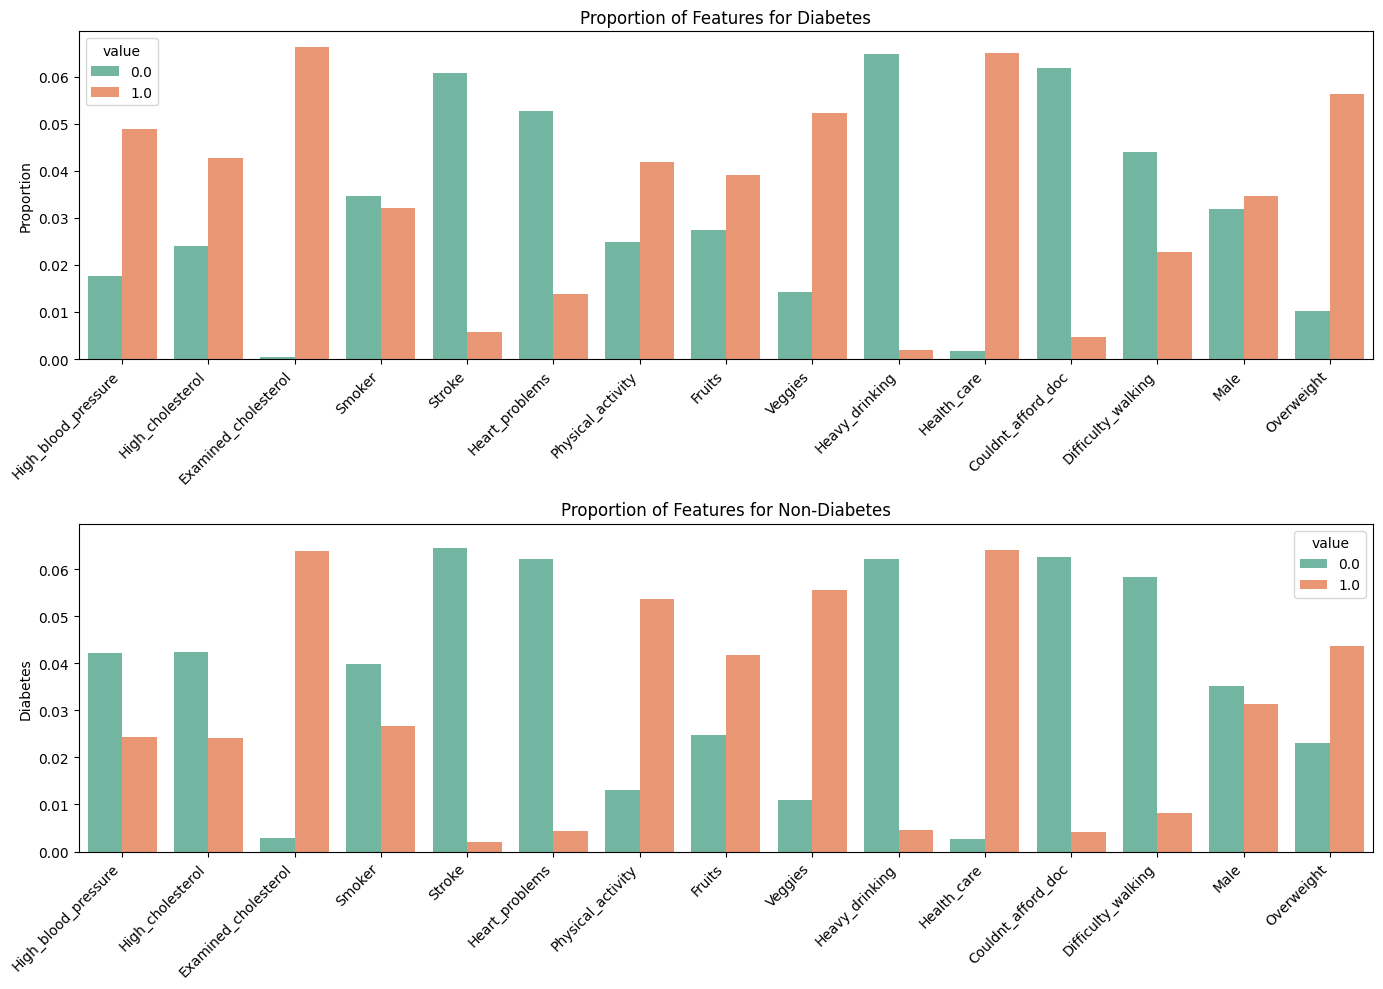

In [6]:
diabetes_per_binary_features(binary_df)

In [7]:
numeric_columns = df.columns[df.nunique() > 2].tolist()
numeric_df = df[["Diabetes"] + numeric_columns]

numeric_df.head()

,Diabetes,Genetic_health,Mental_health,Physical_health,Age,Education,Income
0,0.0,5.0,10.0,20.0,11,4.0,5.0
1,1.0,2.0,0.0,0.0,11,4.0,3.0
2,1.0,2.0,10.0,0.0,9,4.0,7.0
3,1.0,5.0,0.0,30.0,12,3.0,4.0
4,0.0,3.0,0.0,0.0,13,5.0,6.0


In [8]:
def diabetes_per_feature(feature: str, df: pd.DataFrame):
    _, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    palette = sns.color_palette("Set2")

    unique_values = sorted(df[feature].unique())
    bin_edges = [value - 0.5 for value in unique_values] + [unique_values[-1] + 0.5]

    # Plot for Diabetes
    sns.histplot(
        data=df[df["Diabetes"] == 1],
        x=feature,
        bins=bin_edges,
        stat="probability",
        common_norm=False,
        ax=axes[0],
        color=palette[1],
    )
    axes[0].set_title(f"{feature} Distribution for Diabetes")
    axes[0].set_xlabel("")

    # Plot for Non-Diabetes
    sns.histplot(
        data=df[df["Diabetes"] == 0],
        x=feature,
        bins=bin_edges,
        stat="probability",
        common_norm=False,
        ax=axes[1],
        color=palette[0],
    )
    axes[1].set_xlabel("")
    axes[1].set_title(f"{feature} Distribution for Non-Diabetes")
    axes[1].set_ylabel("Proportion")

    plt.tight_layout()
    plt.show()

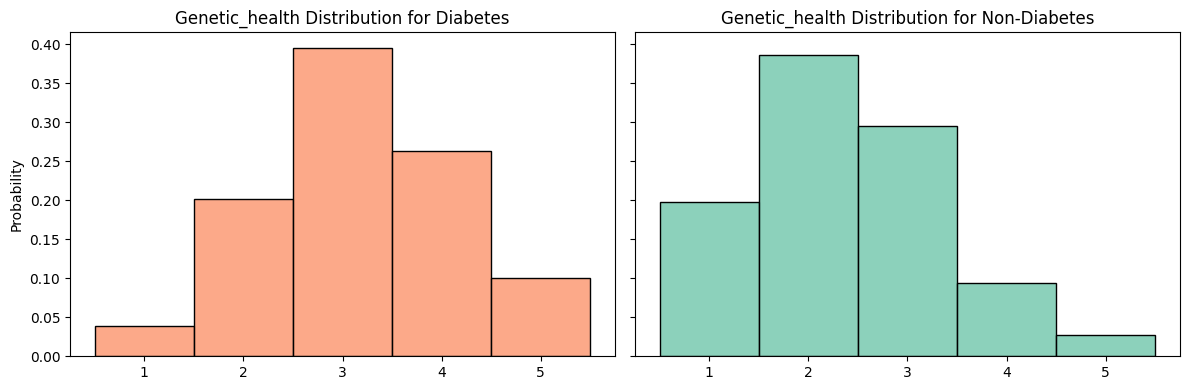

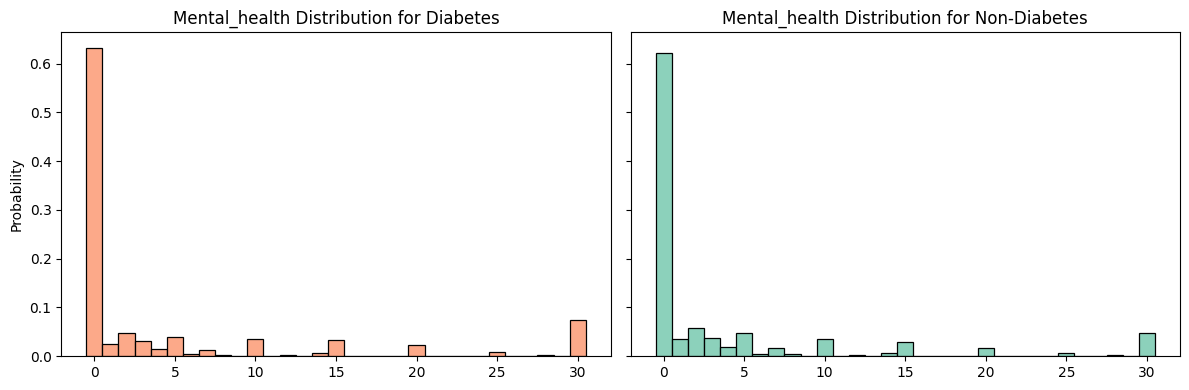

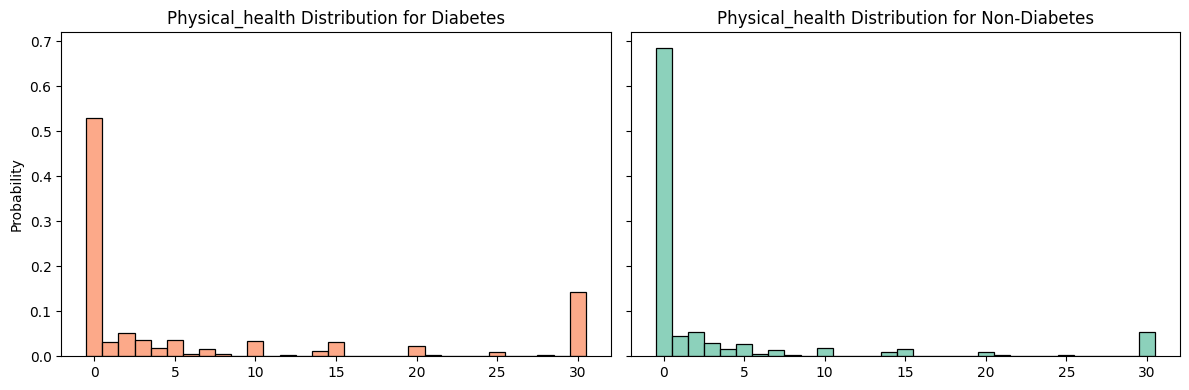

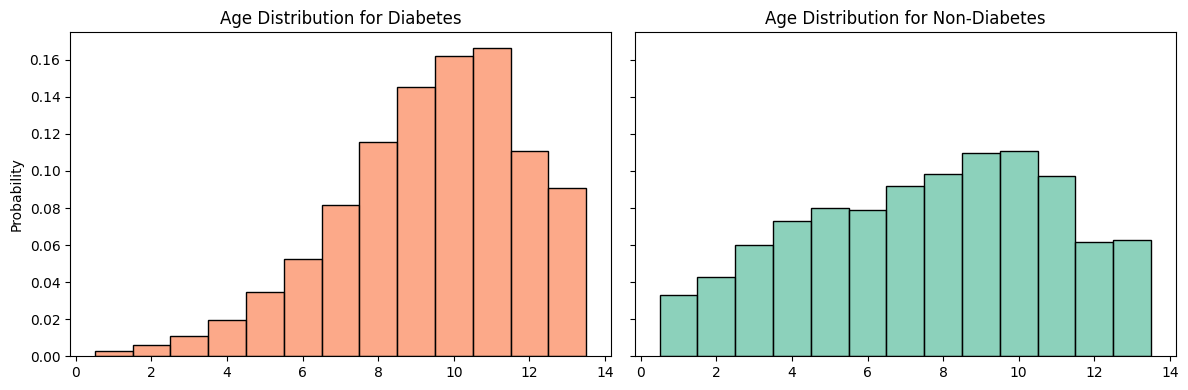

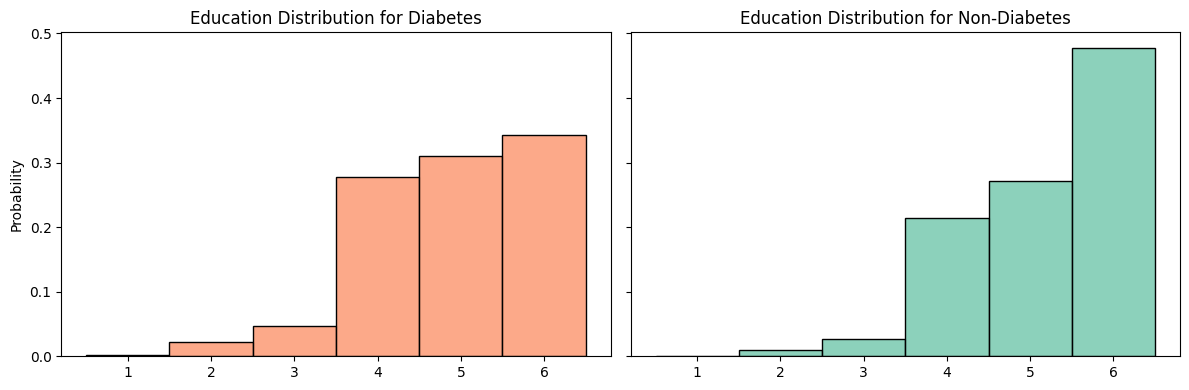

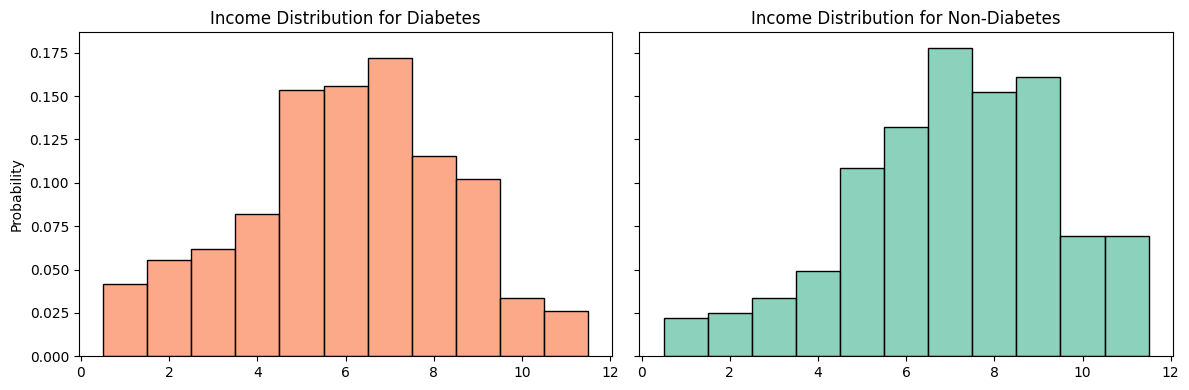

In [9]:
for feature in numeric_columns:
    diabetes_per_feature(feature, numeric_df)

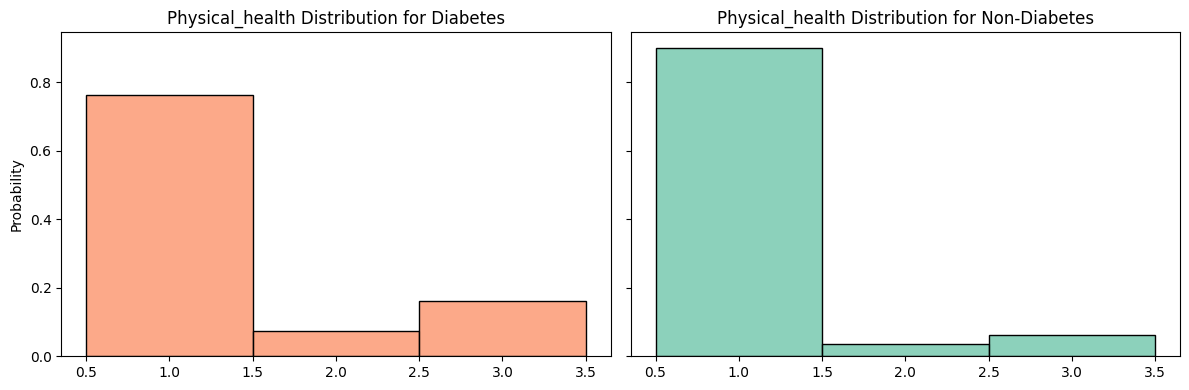

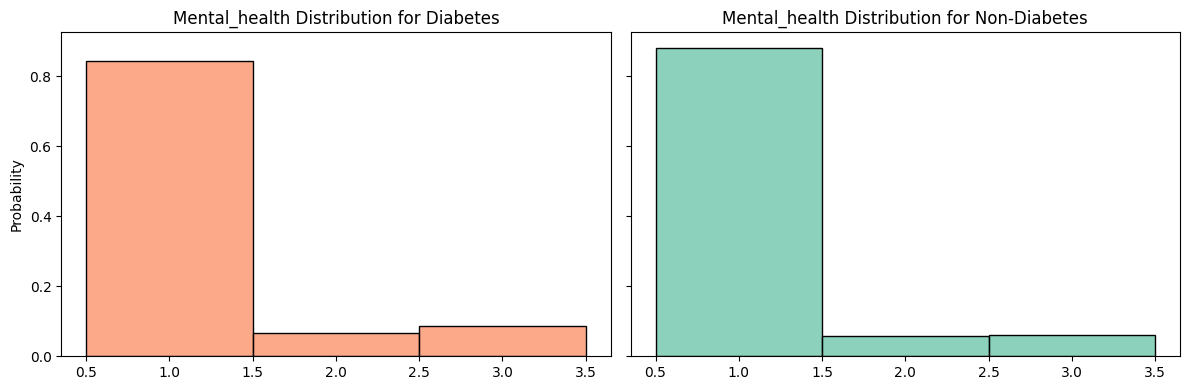

In [10]:
df["Mental_health"] = df["Mental_health"].apply(
    lambda x: 1 if x <= 10 else (2 if x <= 20 else 3)
)

df["Physical_health"] = df["Physical_health"].apply(
    lambda x: 1 if x <= 10 else (2 if x <= 20 else 3)
)

for feature in ["Physical_health", "Mental_health"]:
    diabetes_per_feature(feature, df)

In [11]:
def confusion_matrix_metrics(conf_matrix: np.ndarray) -> dict:
    """
    Calculate and display metrics based on a 2x2 confusion matrix.

    Args:
        conf_matrix (np.ndarray): A 2x2 confusion matrix.

    Returns:
        dict: A dictionary containing the following metrics:
            - TP (True Positive)
            - TN (True Negative)
            - FP (False Positive)
            - FN (False Negative)
            - Accuracy
            - Precision
            - Recall
            - F1 Score
    """
    assert conf_matrix.shape == (2, 2), "Confusion matrix must be a 2x2 matrix"

    tn, fp, fn, tp = conf_matrix.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    return {
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "Accuracy ": f"{accuracy * 100:.2f}%",
        "Precision": f"{precision * 100:.2f}%",
        "Recall   ": f"{recall * 100:.2f}%",
        "F1 Score ": f"{f1_score * 100:.2f}%",
    }

In [12]:
X = df.drop(columns=["Diabetes", "Mental_health"])

y = df["Diabetes"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=123,
)

In [13]:
lr_model = LogisticRegression(max_iter=10000)

n_features_to_select = 12
selector = RFE(lr_model, n_features_to_select=n_features_to_select)

selector = selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

X_train_top_12 = selector.transform(X_train)
X_test_top_12 = selector.transform(X_test)

lr_model.fit(X_train_top_12, y_train)
predicted_probabilities = lr_model.predict_proba(X_test_top_12)[:, 1]

threshold = 0.3125

lr_y_pred = (predicted_probabilities >= threshold).astype(int)

lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)

for coef, feature in zip(X.columns, lr_model.coef_[0]):
    print(f"{coef:<21}: {feature:>7.4f}")

confusion_matrix_metrics(lr_conf_matrix)

High_blood_pressure  :  0.9314
High_cholesterol     :  0.6179
Examined_cholesterol :  1.5154
Smoker               :  0.1966
Stroke               :  0.3663
Heart_problems       : -0.3035
Physical_activity    : -0.8082
Fruits               :  0.5198
Veggies              : -0.1303
Heavy_drinking       :  0.3587
Health_care          :  0.1715
Couldnt_afford_doc   :  0.6984


{'TP': 3140,
 'TN': 46601,
 'FP': 4093,
 'FN': 5261,
 'Accuracy ': '84.17%',
 'Precision': '43.41%',
 'Recall   ': '37.38%',
 'F1 Score ': '40.17%'}

In [14]:
try:
    gb_best_model = joblib.load("models/gb_model.joblib")

except FileNotFoundError:
    gb_model = GradientBoostingClassifier()

    param_dist = {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    }

    gb_scorer = make_scorer(recall_score)

    gb_random_search = RandomizedSearchCV(
        gb_model,
        param_distributions=param_dist,
        scoring=gb_scorer,
        n_iter=10,
        cv=3,
        random_state=123,
        n_jobs=-1,
    )

    gb_random_search.fit(X_train, y_train)
    gb_best_model = gb_random_search.best_estimator_

    joblib.dump(gb_best_model, "models/gb_model.joblib")


gb_y_pred = gb_best_model.predict(X_test)

gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)
confusion_matrix_metrics(gb_conf_matrix)

{'TP': 1360,
 'TN': 49255,
 'FP': 1439,
 'FN': 7041,
 'Accuracy ': '85.65%',
 'Precision': '48.59%',
 'Recall   ': '16.19%',
 'F1 Score ': '24.29%'}

In [15]:
try:
    knn_best_model = joblib.load("models/knn_model.joblib")

except FileNotFoundError:
    knn_model = KNeighborsClassifier()

    param_dist_knn = {
        "n_neighbors": [3, 5, 7, 10],
        "weights": ["uniform", "distance"],
        "p": [1, 2],
    }

    knn_scorer = make_scorer(recall_score)

    knn_random_search = RandomizedSearchCV(
        knn_model,
        param_distributions=param_dist_knn,
        scoring=knn_scorer,
        n_iter=10,
        cv=3,
        random_state=123,
        n_jobs=-1,
    )

    knn_random_search.fit(X_train, y_train)
    knn_best_model = knn_random_search.best_estimator_

    joblib.dump(knn_best_model, "models/knn_model.joblib")


knn_y_pred = knn_best_model.predict(X_test)

knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
confusion_matrix_metrics(knn_conf_matrix)

{'TP': 1940,
 'TN': 46896,
 'FP': 3798,
 'FN': 6461,
 'Accuracy ': '82.64%',
 'Precision': '33.81%',
 'Recall   ': '23.09%',
 'F1 Score ': '27.44%'}

In [16]:
smote_enn = SMOTEENN(random_state=123)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [17]:
nb_model_SM = GaussianNB()

nb_model_SM.fit(X_resampled, y_resampled)

nb_y_pred_SM = nb_model_SM.predict(X_test)

nb_conf_matrix_SM = confusion_matrix(y_test, nb_y_pred_SM)
confusion_matrix_metrics(nb_conf_matrix_SM)

{'TP': 6090,
 'TN': 35699,
 'FP': 14995,
 'FN': 2311,
 'Accuracy ': '70.71%',
 'Precision': '28.88%',
 'Recall   ': '72.49%',
 'F1 Score ': '41.31%'}

In [18]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

nb_y_pred = nb_model.predict(X_test)

nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
confusion_matrix_metrics(nb_conf_matrix)

{'TP': 4890,
 'TN': 40787,
 'FP': 9907,
 'FN': 3511,
 'Accuracy ': '77.29%',
 'Precision': '33.05%',
 'Recall   ': '58.21%',
 'F1 Score ': '42.16%'}